# Predicting Hotel Booking Cancellations
## Data Wrangling

### Table of Contents

* [1. Introduction](#chapter1)
* [2. Importing libraries](#chapter2)
* [3. Data Loading and Joining](#chapter3)
* [4. Data Organization](#chapter4)
* [5. Data Definition and Univariate Analysis](#chapter5)
    * [5.1 Features description](#chapter51)
    * [5.2 Univariate Analysis - Exploring the numerical features distributions](#chapter52)
    * [5.3 Analyzing outliers in numerical features](#chapter53)
    * [5.4 Categorical features analysis](#chapter54)
    * [5.5 Categorical Features VS Target Feature(is_canceled) analysis](#chapter55)
* [6. Data cleaning - Dealing with missing values](#chapter6)
* [7. Saving data](#chapter7)

## 1. Introduction  <a class="anchor" id="chapter1"></a>
Booking cancellations are without a doubt the biggest headaches of any revenue manager or hotel manager nowadays. The simplicity of canceling the reservation and the fact that most of the time there is no fee involved makes it extremely easy for customers to cancel their reservations and create a missed opportunity for the hotels. If before 2020 booking cancellations was a top issue for hotels with percentage of cancelations going as high as 40% or 50% in some hotels, in 2021, one year after the pandemic that hit the hospitality industry so hard, having a tool to predict customers booking cancelations became vital for the success or even survival of these businesses.

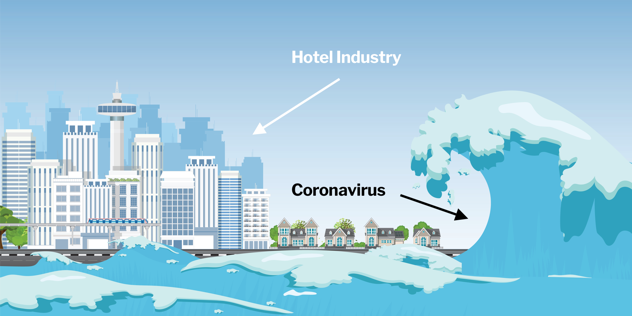

One of the immediate economic impacts that happened after COVID-19 was declared a world-wide pandemic was the full stop in everything that was related to tourism. Bars and restaurants, airlines and hotels were hit the hardest by this. So with limited customers willing to travel and to book a hotel room and plenty of availability, it became crucial for hotels to attract new customers, and even more important to identify those who might cancel their reservation and establish a business strategy to have them keep their reservation before they cancel. So for their survival in a pandemic and post-pandemic world, hotels must adapt and use all tools at hand to maximize profits.

These are the reasons I decided to choose data from hospitality industry to create my Capstone project. The data I found comes from 2 hotels from Portugal and it consists of bookings records from a two year period, 2015 to 2017. The records contain information about the customer such as what type of room he wants, how man parking spaces, what type of meals, and so on. Obviously, for security reasons, any information regarding actual customers, the hotels, agents or companies working with the two hotels was changed to protect that sensitive data.

The project comprises all steps of Data Science work flow divided as follows:

 - [Data wangling](Data_Wrangling.ipynb)
 - [Exploratory Data Analysis](EDA.ipynb)
 - Pre-processing and training data development
 - Modeling
 - Documentation

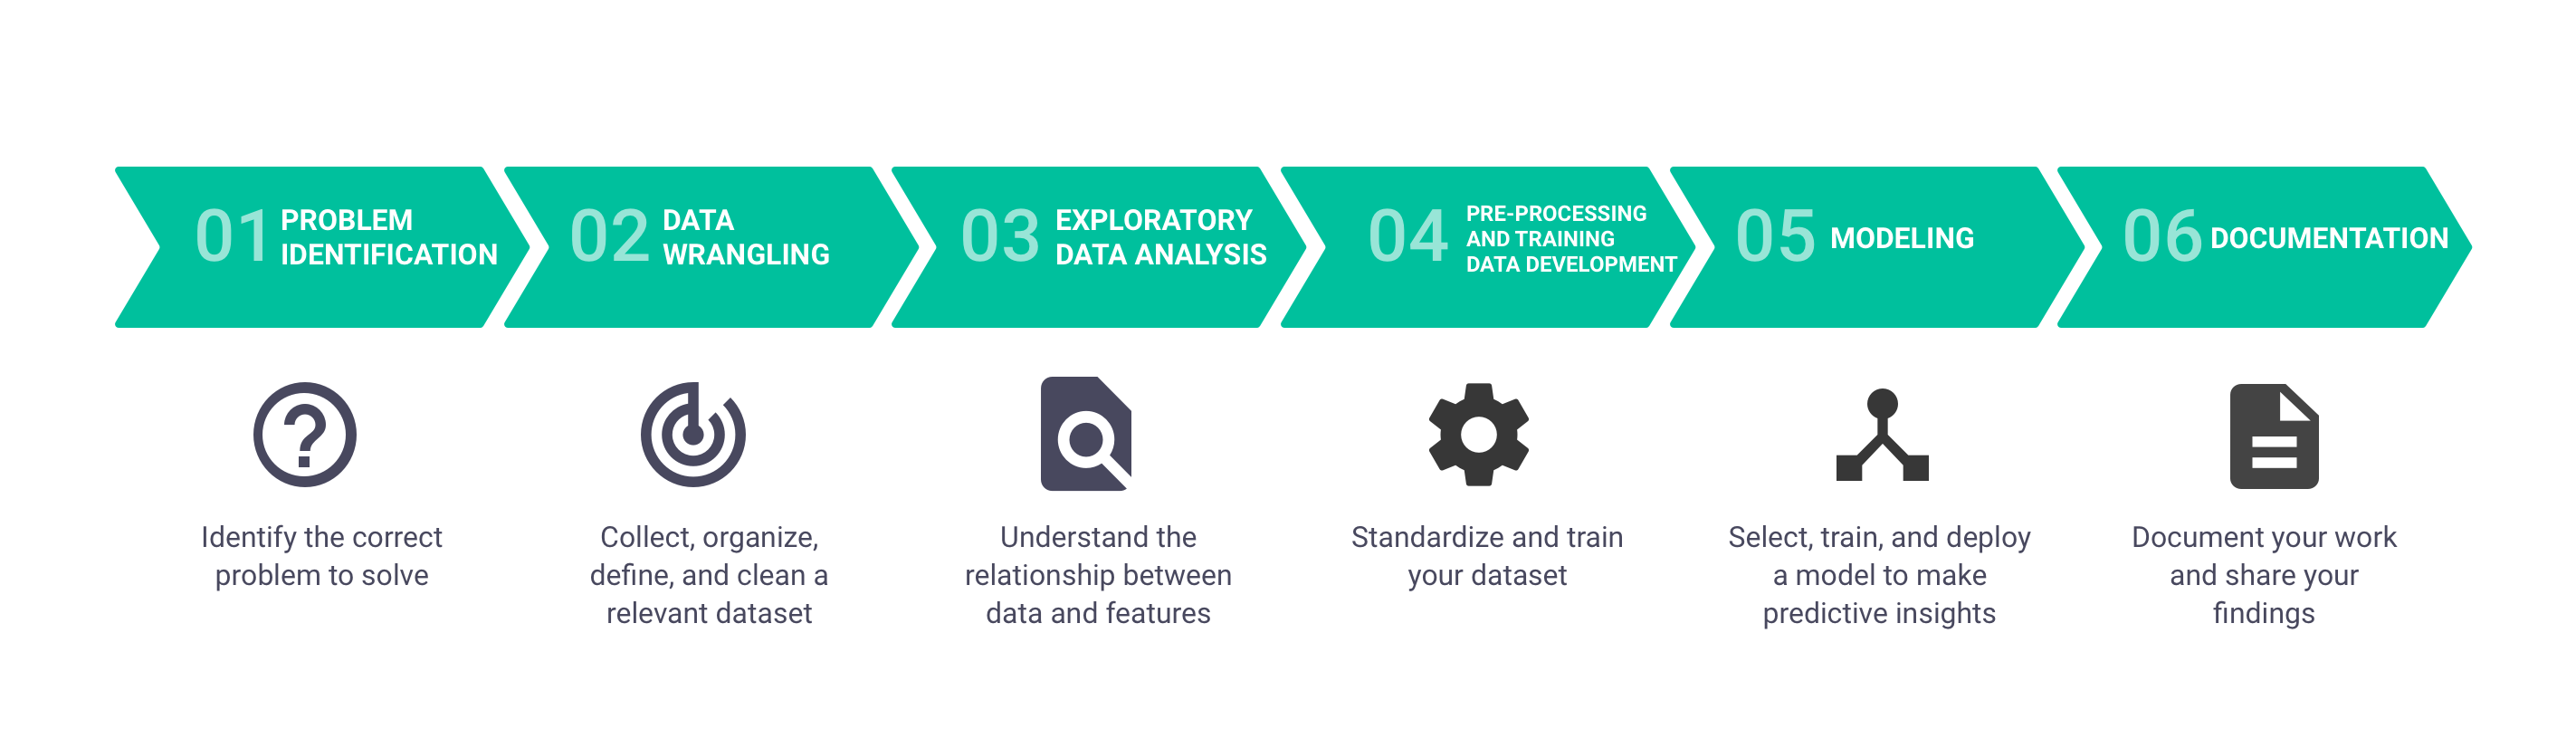

## 2. Importing libraries <a class="anchor" id="chapter2"></a>

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

## 3. Data Loading and Joining <a class="anchor" id="chapter3"></a>

In [2]:
#Loading the data from the 2 hotels
h1 = pd.read_csv('../data/raw/H1.csv')
h2 = pd.read_csv('../data/raw/H2.csv')
h1.head(2)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01


Since the data is at this moment in 2 different documents, we will add a column at the begining of each dataframe containing the Hotel location and type: "Algarve Resort Hotel" respectively "Lisbon City Hotel". Then we will combine the 2 dataset for easier data organization and cleaning

In [3]:
#Adding a new column, hotel_name, before merging the 2 given datasets
h1.insert(0, column = 'hotel_name', value="Algarve Resort Hotel")
h2.insert(0, column = 'hotel_name', value="Lisbon City Hotel")
hotels = h1.append(h2)
hotels.head()

,hotel_name,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,Algarve Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Algarve Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Algarve Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Algarve Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Algarve Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
print("Dataset size:", hotels.shape)

Dataset size: (119390, 32)


## 4. Data Organization <a class="anchor" id="chapter4"></a>

We can see that the features names can be improved for a better visibility. So we will replace the uppercase with lowercase and insert an underscore between words.

In [5]:
#Using existing column names to create updated names
hotels.columns

Index(['hotel_name', 'IsCanceled', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [6]:
#Updating the columns names
new_columns = ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year','arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel','is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']
hotels.columns = new_columns
hotels

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Algarve Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Algarve Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Algarve Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Algarve Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Algarve Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,Lisbon City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,Lisbon City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,Lisbon City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,Lisbon City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
#Let's explore the data types
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal             

In [8]:
#Changing the type of categorical data to 'category'. 
categ_columns = ['hotel','arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel',
                     'is_repeated_guest', 'reserved_room_type','assigned_room_type', 'deposit_type', 'agent','company',
                     'customer_type','reservation_status']
hotels['reservation_status_date'] = pd.to_datetime(hotels['reservation_status_date'])
for i in new_columns:
    if i in  categ_columns:
        hotels[i] = hotels[i].astype('object')
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Algarve Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Algarve Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Algarve Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Algarve Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Algarve Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
#New data types
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64 

## 5. Data Definition and Univariate Analysis <a class="anchor" id="chapter5"></a>

We will start by exploring the features descriptions and values as presented in the [Science Direct](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005) article.

After that, we will  using the **describe** method on categorical and then on non-categorical features. 

### 5.1 Features description <a class="anchor" id="chapter51"></a>

 0. **hotel** - The 2 hotels from Portugal: "Resort Hotel" at the resort region of Algarve and "City Hotel" at the city of Lisbon.
 1. **is_canceled** - Value indicating if the booking was canceled (1) or not (0)
 2. **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS(Property Management System) and the arrival date
 3. **arrival_date_year** - Year of arrival date
 4. **arrival_date_month** - Month of arrival date with 12 categories: “January” to “December”
 5. **arrival_date_week_number** - Week number of the arrival date
 6. **arrival_date_day_of_month** - Day of arrival date
 7. **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
 8. **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
 9. **adults** - Number of adults
 10. **children** - Number of children
 11. **babies** - Number of babies
 12. **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
        - Undefined/SC – no meal package;
        - BB – Bed & Breakfast;
        - HB – Half board (breakfast and one other meal – usually dinner);
        - FB – Full board (breakfast, lunch and dinner)
 13. **country** - Country of origin. Categories are represented in the [ISO 3155–3:2013](https://www.iso.org/standard/63547.html) format.
 14. **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
 15. **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
 16. **is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)
 17. **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking
 18. **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking
 19. **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons
 20. **assigned_room_type** - Code for the type of room assigned to the booking.
 21. **booking_changes** - Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
 22. **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
     - No Deposit – no deposit was made;
     - Non Refund – a deposit was made in the value of the total stay cost;
     - Refundable – a deposit was made with a value under the total cost of stay.
 23. **agent** - ID of the travel agency that made the booking
 24. **company** - ID of the company/entity that made the booking or responsible for paying the booking
 25. **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer
 26. **customer_type** - Type of booking, assuming one of four categories:
    - Contract - when the booking has an allotment or other type of contract associated to it;
    - Group – when the booking is associated to a group;
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
    - Transient-party – when the booking is transient, but is associated to at least other transient booking
 27. **adr** - The average daily rate (ADR) is a metric widely used in the hospitality industry to indicate the average revenue earned for an occupied room on a given day
 28. **required_car_parking_spaces** - Number of car parking spaces required by the customer
 29. **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)
 30. **reservation_status** - Reservation last status, assuming one of three categories:
        - Canceled – booking was canceled by the customer;
        - Check-Out – customer has checked in but already departed;
        - No-Show – customer did not check-in and did inform the hotel of the reason why
 31. **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

### 5.2 Univariate Analysis - Exploring the numerical features distributions <a class="anchor" id="chapter52"></a>

The purpose of the univariate analysis is to take a deeper look into the features existent in our data. We are looking at the shape of our distributions, ranges of values and outliers. 

In [10]:
# Numerical features summary
hotels.describe(exclude = 'object', datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
is_canceled,119390,0.370416,0,0,0,1,1,0.482918
lead_time,119390,104.011,0,18,69,160,737,106.863
arrival_date_year,119390,2016.16,2015,2016,2016,2017,2017,0.707476
arrival_date_week_number,119390,27.1652,1,16,28,38,53,13.6051
arrival_date_day_of_month,119390,15.7982,1,8,16,23,31,8.78083
stays_in_weekend_nights,119390,0.927599,0,0,1,2,19,0.998613
stays_in_week_nights,119390,2.5003,0,1,2,3,50,1.90829
adults,119390,1.8564,0,2,2,2,55,0.579261
children,119386,0.10389,0,0,0,0,10,0.398561
babies,119390,0.00794874,0,0,0,0,10,0.0974362


We ca draw some conclusions based on the summary of the numerical features:
- We have a **37.04% cancelation rate** for the 2 hotels
- the average lead_time is 104 days, so on average it takes more than 3 months from the booking date until the arrival date
- we have some surprisingly long stays( 19 weekend nights, respectively 50 week nights) 
- We also have some surprisingly large reservations groups( 55 adults, or 10 children and 10 babies)
- we also have an unexpected high number of previous_cancelations for one record - 26

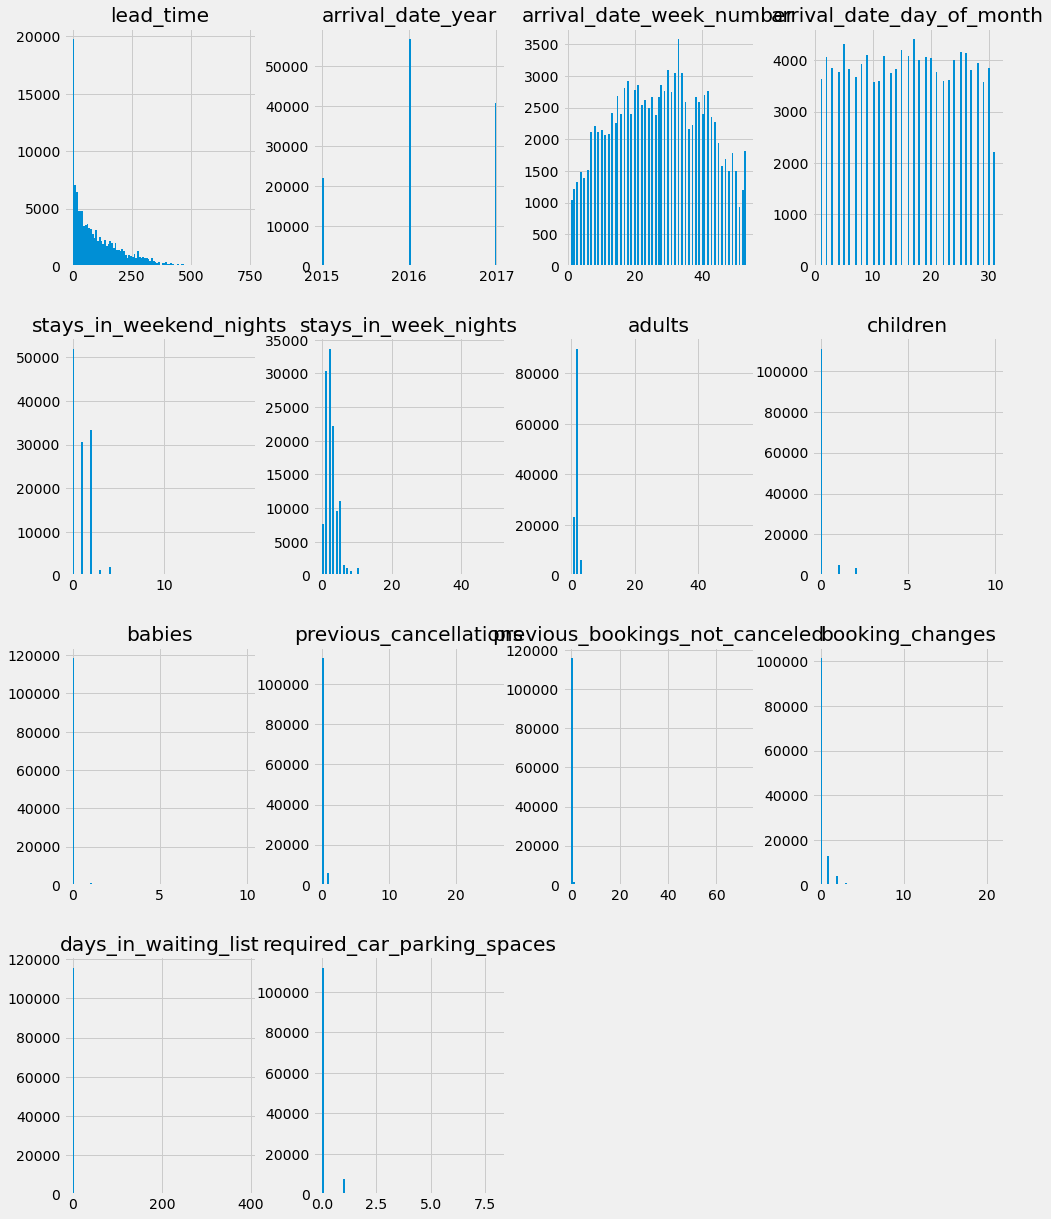

In [11]:
#First we will explore thesefeatures with a histogram plot
numeric_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                    'stays_in_weekend_nights','stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
                    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list','required_car_parking_spaces',
                    'reservation_status_date']

hotels[numeric_features].hist(figsize=(15,20), bins = 100)
plt.show()

What we can observe immediately is that while there are a few features that have values distributed somewhat uniformely, like **lead_time, arrival_date_year, arrival_date_week_number** or **arrival_date_day_of_month**, the other features are having the majority of their values towards **0** and some outliers.

### 5.3 Analyzing outliers in numerical features <a class="anchor" id="chapter53"></a>

Now, let's explore some of **the outliers in the numerical features** we were able to identify with the help of the describe method:
- stays_in_weekend_nights having value as high as 19 **&** stays_in_week_nights with values as high as 50
- adults - 55
- babies - 10
- children - 10
- required_car_parking_spaces - 8

>**Q1:** We see there are bookings that include as much as 19 weekend nights. This means that the intended stay was at least 2 months. Let's explore the top longest stays by **stays_in_weekend_nights**.

In [12]:
#Exploring the very long stay in hotels
hotels.sort_values(by = 'stays_in_weekend_nights', ascending = False).head().T

,14038,14037,9839,61734,33924
hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel,Lisbon City Hotel,Algarve Resort Hotel
is_canceled,0,0,1,0,0
lead_time,126,113,322,140,71
arrival_date_year,2016,2015,2017,2016,2017
arrival_date_month,July,August,January,September,January
arrival_date_week_number,28,31,2,39,2
arrival_date_day_of_month,5,1,10,22,10
stays_in_weekend_nights,19,18,16,16,16
stays_in_week_nights,50,42,40,41,40
adults,1,1,2,0,2


>**A1:** These seem to be fine. The numbers of weekend nights match in lenght the numbers of week nights, so there was no error in entering information into the database for either feature. Also, we can see that the number 4 out of these 5 bookings went through, so these are valid entries.


>**Q2:** The top value for **adults** is 55. Are these entries accurate, or was it a typing error? Were the bookings kept or canceled? Let's explore the bookings with the highest number of adults.

In [13]:
#Exploring the high occupancy reservations
hotels.sort_values(by = 'adults', ascending = False).head(10).T

,2173,1643,1539,1917,1962,2003,1752,2164,1587,1884
hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel,Algarve Resort Hotel
is_canceled,1,1,1,1,1,1,1,1,1,1
lead_time,338,336,304,349,352,354,340,361,333,347
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,October,September,September,September,September,September,September,October,September,September
arrival_date_week_number,41,37,36,39,39,39,37,40,36,38
arrival_date_day_of_month,4,7,3,21,24,26,12,3,5,19
stays_in_weekend_nights,2,1,0,1,1,2,2,2,2,2
stays_in_week_nights,0,2,3,3,3,5,5,5,5,5
adults,55,50,40,27,27,26,26,26,26,26


>**A2:** Upon intial verification, I decided to extend the analysis on the booking with the highest number of adults to the top 10 entries.<br>
<br>We can see that these 10 reservations were always canceled. The number of adults was between 55 and 26, they were all Groups, no babies or children, and the lead_time was always over 300 days. I thinks these were not errors in entries and these were all real bookings that got canceled.<br>
<br>Having up to **55 adults** in a booking that then gets canceled is a huge missed opportunity for any hotel because it can mean around 20 rooms on hold, so these occurences must be caught in time and dealt with. Furthermore, having one of these reservations canceled is bad, but **having all the top 10 highest booked reservations canceled** is really going to affect the business revenue.

>**Q3:** Is the same situations going to happen with the reservations having a high number of **babies**?

In [14]:
#Exploring the high number of babies and children in reservations
hotels.sort_values(by = 'babies', ascending = False).head().T

,6559,38596,54003,64291,33332
hotel,Lisbon City Hotel,Lisbon City Hotel,Lisbon City Hotel,Lisbon City Hotel,Algarve Resort Hotel
is_canceled,0,0,0,0,0
lead_time,37,11,4,19,31
arrival_date_year,2016,2015,2016,2017,2017
arrival_date_month,January,October,July,January,February
arrival_date_week_number,3,42,31,2,8
arrival_date_day_of_month,12,11,27,8,19
stays_in_weekend_nights,0,2,0,2,1
stays_in_week_nights,2,1,4,2,0
adults,2,1,2,2,2


>**A3:** These entries seem to be accurate as well. I see the number of adults beeing 2 and 1. So it is possible to have a large group of children escorted by one or two adults. 
Most important, all the top 5 entries went through, so they most certainly were good valid entries.

>**Q4:** Are the reservations having a high number of children also good entries?

In [15]:
hotels.sort_values(by = 'children', ascending = False).head().T

,328,76772,924,79010,66327
hotel,Algarve Resort Hotel,Lisbon City Hotel,Lisbon City Hotel,Lisbon City Hotel,Lisbon City Hotel
is_canceled,1,0,0,0,0
lead_time,55,14,1,0,3
arrival_date_year,2015,2017,2015,2017,2017
arrival_date_month,July,July,August,August,February
arrival_date_week_number,29,30,33,35,8
arrival_date_day_of_month,12,24,10,29,22
stays_in_weekend_nights,4,1,1,0,0
stays_in_week_nights,10,1,1,1,3
adults,2,0,0,2,2


>**A4:** There is only one booking with a worrisome 10 children in it, and it was a **No-Show** but the customer type is a **Contract** customer, so it is like for it to be a good entry as well. The rest of the 4 top entries have 3 children, which is nothing out of the ordinary.

>**Q5:** Lastly, let's explore the records with the highest number of **required_car_parking_spaces**.

In [16]:
hotels.sort_values(by = 'required_car_parking_spaces', ascending = False).head().T

,29045,29046,62702,38117,70752
hotel,Algarve Resort Hotel,Algarve Resort Hotel,Lisbon City Hotel,Algarve Resort Hotel,Lisbon City Hotel
is_canceled,0,0,0,0,0
lead_time,26,138,13,205,30
arrival_date_year,2017,2017,2016,2017,2017
arrival_date_month,March,March,December,June,April
arrival_date_week_number,11,12,50,26,17
arrival_date_day_of_month,14,19,5,26,29
stays_in_weekend_nights,0,2,1,3,2
stays_in_week_nights,5,2,0,10,1
adults,2,2,1,2,2


>**A5:** We have 2 bookings with a high number, 8, the rest of the top are having 3 parking spaces, which is within the normal limits. Looking at the 2 booking with 8, we can see the are a week apart, and the customers are from Austria, **Transient-Party**, and **Corporate**. So we have all the signs to believe this was not a typo.

> Finally let's check the extreme **adr** values

In [17]:
hotels.sort_values(by = 'adr', ascending = False).head().T

,8455,71343,15083,63852,13142
hotel,Lisbon City Hotel,Lisbon City Hotel,Algarve Resort Hotel,Lisbon City Hotel,Algarve Resort Hotel
is_canceled,1,0,0,0,1
lead_time,35,0,1,81,378
arrival_date_year,2016,2017,2015,2016,2017
arrival_date_month,March,May,July,December,August
arrival_date_week_number,13,19,29,53,31
arrival_date_day_of_month,25,9,15,31,1
stays_in_weekend_nights,0,0,0,1,4
stays_in_week_nights,1,1,1,1,10
adults,2,1,2,2,2


In [18]:
# The 5400 values is surely an outlier and seems an erros, being more than 10 times bigger than the second biggest value
hotels = hotels[hotels.adr<5000]
hotels.describe().adr

count    119389.000000
mean        101.786744
std          48.153554
min          -6.380000
25%          69.290000
50%          94.560000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In conclusion we see that these outliers values don't seem to be input errors, but they were simply extreme casses. 

The only outlier that we removed was the extremey high **adr**. 
Apart from this, there were some interesting trends and correlations that we found

### 5.4 Categorical features analysis <a class="anchor" id="chapter54"></a>

Moving to some basic exploratory analysis on our categorical features, we will first use the describe method to have a look at the top value and we will also calculate what is the percentage of the most common value from total.

In [19]:
#Categorical features summary
categ_f = hotels.describe(include = 'object').T
categ_f['% of 1st categ'] = (categ_f['freq']/categ_f['count']*100).astype('int64')
categ_f

,count,unique,top,freq,% of 1st categ
hotel,119389,2,Lisbon City Hotel,79329,66
arrival_date_month,119389,12,August,13877,11
meal,119389,5,BB,92309,77
country,118901,177,PRT,48589,40
market_segment,119389,8,Online TA,56477,47
distribution_channel,119389,5,TA/TO,97869,81
is_repeated_guest,119389,2,0,115579,96
reserved_room_type,119389,10,A,85993,72
assigned_room_type,119389,12,A,74052,62
deposit_type,119389,3,No Deposit,104641,87


We ca draw some conclusions based on the summary of the categorical features:
- August was the month with most bookings
- Portugal was the residence country of most of the visitors, but what is surprising is that people from 177 countries visite in the 2 year one of the 2 hotels
- It is surprising that 115580 of the 119390 records are new customers(96%)
- 94% of booking are not made by the company
- 75% of customers are transient

### 5.5 Categorical Features VS Target Feature(is_canceled) analysis <a class="anchor" id="chapter55"></a>

Next, let's explore the uniques values in our categorical features and how they are distributed against our target feature, **is_canceled**.

For this, we will first create 2 functions to help us graph the features distribution in correlation with cancelations and secondly the percentage of cancelations per feature value.

In [20]:

def graph_feature(feature, list_values):
    sns.catplot(x=feature, hue = 'is_canceled', kind="count", data=hotels, order = list_values, height=5, aspect=14/5)
    plt.title('{} vs is_canceled'.format(feature))
    plt.show()
    
def graph_percentage(feature, list_values):
    plots = hotels.groupby(by = feature).describe().is_canceled['mean'].plot.bar(color = 'g')
    for bar in plots.patches:
        plots.annotate('{:.2%}'.format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
        
    plt.xticks(np.arange(len(list_values)), list_values, rotation = 45)
    plt.ylabel('Percent canceled')
    plt.title('Percentage of canceled Bookings per {}'.format(feature))
    


>**Q6:** Is there any obvious correlations between the month of the reservations and the cancelations? And what are the months with the highest reservations?

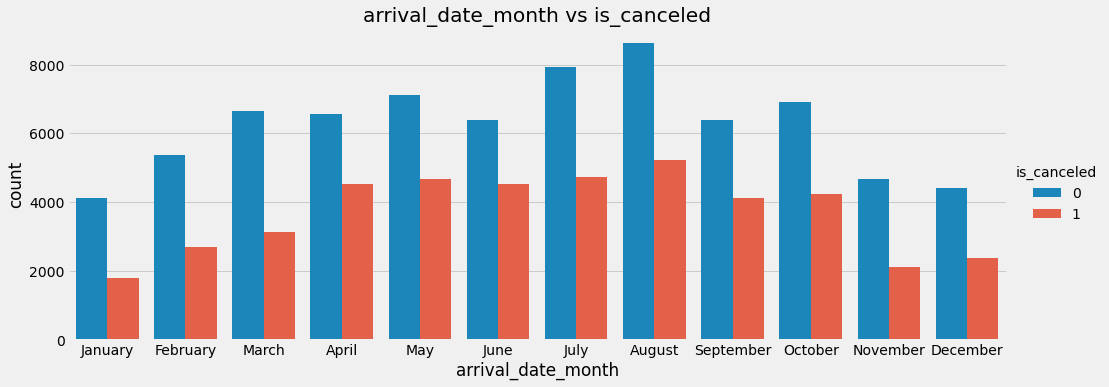

In [21]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
    
graph_feature("arrival_date_month", months_order)

>**A6:** As expected, the winter months see less bookings, while July and August are the 2 months with the most bookings. But let's explore the percentage of canceled to see what are the months with the highest percentage of canceled bookings.

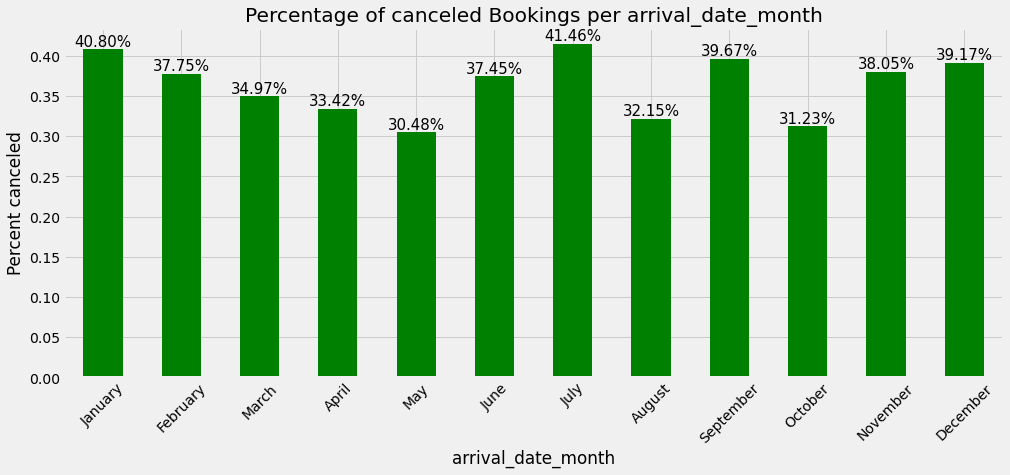

In [22]:
graph_percentage('arrival_date_month', months_order)

>**A6:** Somewhat surprisingly, the months with the highest percentage of cancelations are **January** and **July**, with **over 40%**, while **May** and **October** have the lowest rate of cancelations, with values under **32%**.

>**Q7:** What are the meal types prefferend by customers? Is there an obvious relation between meals and cancelations?

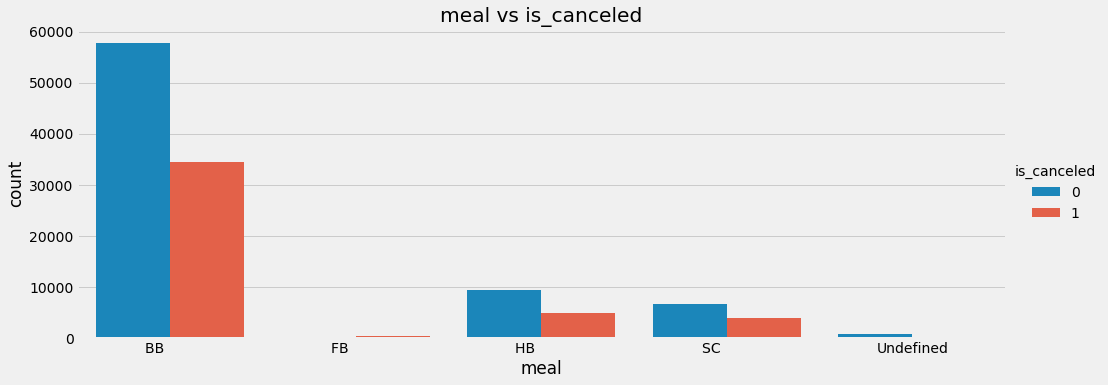

In [23]:
meals = ['BB ', 'FB ', 'HB ', "SC ", "Undefined"]
sns.catplot(x="meal", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('meal vs is_canceled')
plt.show()

>**Q7:** We can see that the most common meal type is BB - Bed and Breakfast.

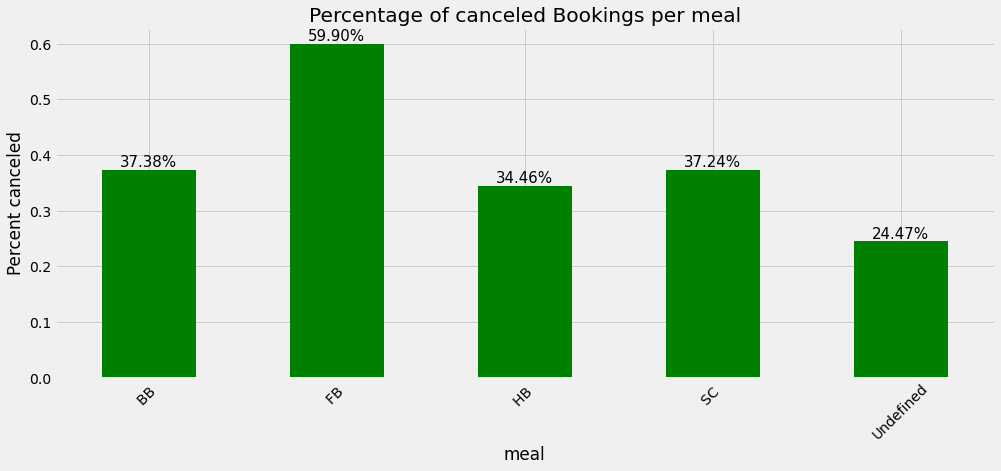

In [24]:
graph_percentage('meal', meals)

>**Q7**: We see there is a higher tendancy to have a cancelation between the customers that have a **Full Board** type of meal on their reservations(60% cancelations), while all other meal types have under 38% cancelation rates.

>**A8:** Where are the customers comming from when refering to the market segment? Is there an obvious relation between this and cancelations?

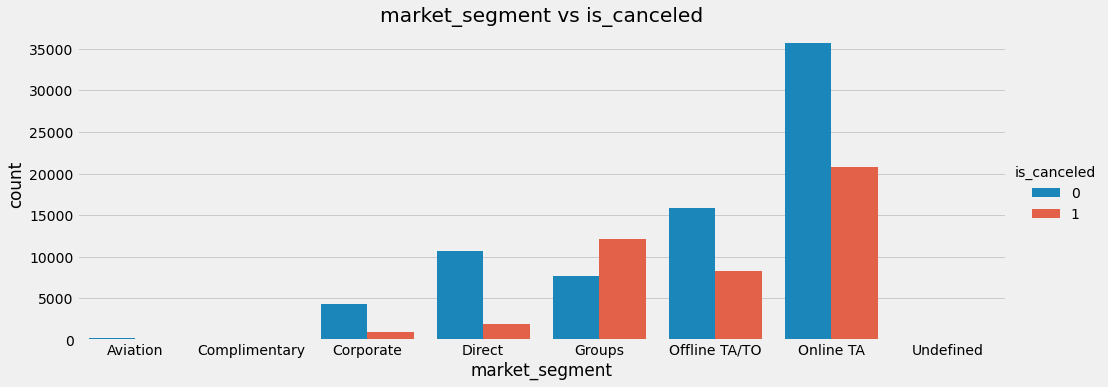

In [25]:
market_s = ('Aviation','Complimentary','Corporate','Direct','Groups','Offline TA/TO', 'Online TA','Undefined')

graph_feature("market_segment", market_s)

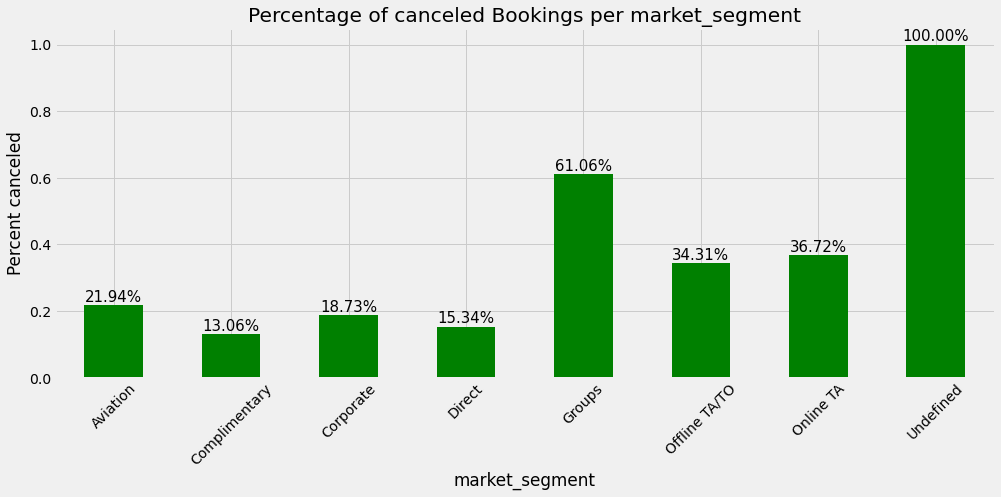

In [26]:
graph_percentage('market_segment', market_s)

>**A8:** We can see that **Groups** are more prone to canceling their reservations, with over 60% cancelation rate. And there's the **Undefined** market_segment, with 100% cancelation rate.

>**Q9:** Exploring the distribution channels, what are the most used? are these correlated to the cancelations?

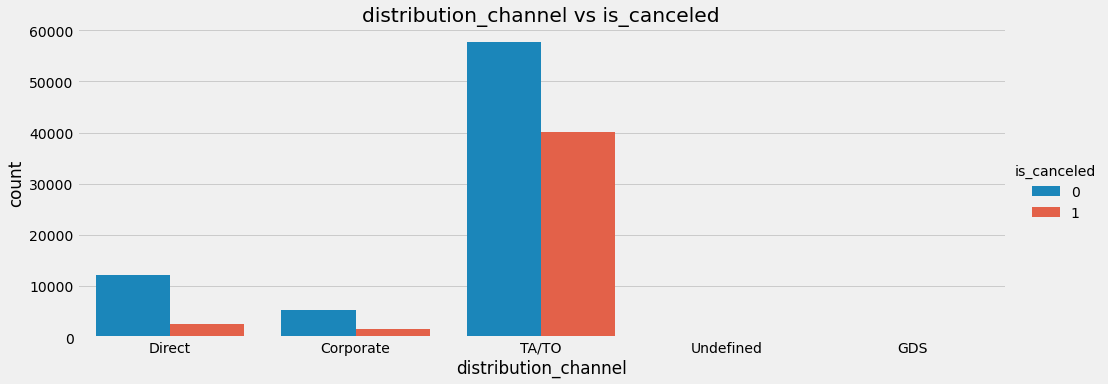

In [27]:
d_channel = ('Direct','Corporate','TA/TO','Undefined','GDS')
graph_feature("distribution_channel", d_channel)


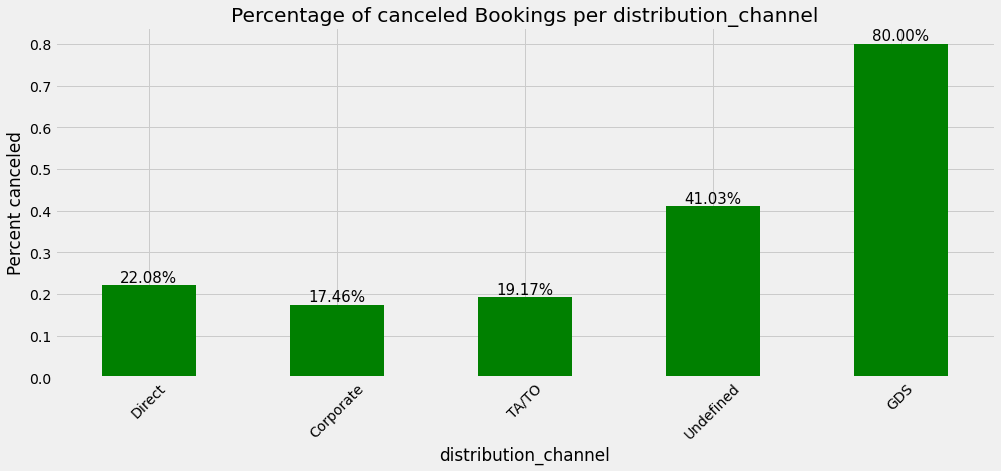

In [28]:
graph_percentage('distribution_channel', d_channel)

>**A9:** It seems that the highest percentages of cancelations happened for the **Undefined** and **GDS** channels, but these 2 were very low represented in our data. **Corporate** has the lowest cancelation rate with under **19%**.

>**Q10**: How many customers are a **repeated guest**? And how much this influences on the cancelation rate?

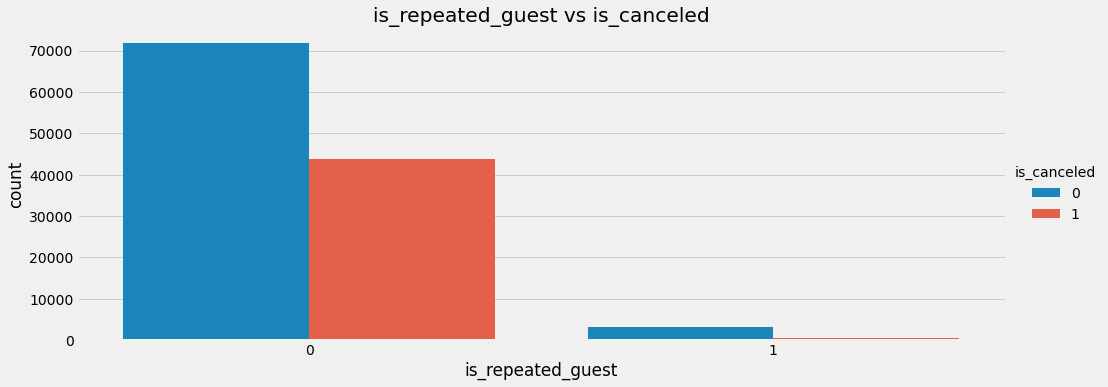

In [29]:
sns.catplot(x="is_repeated_guest", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('is_repeated_guest vs is_canceled')
plt.show()

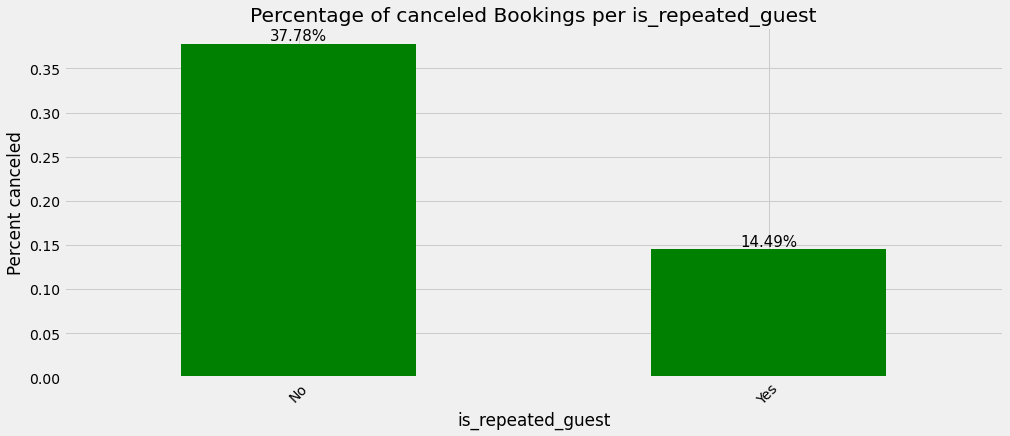

In [30]:
graph_percentage('is_repeated_guest', ('No','Yes'))

>**A10:** As we can see, there are very few customers that are a repeated guests. Furthermore, we can see that beeing a repeated customer greatly decreases the rate of cancelations, from over 36% to below 15%.

>**Q11:** What is the most common type of deposit made? Does that seem to be correlated to the cancelations? 

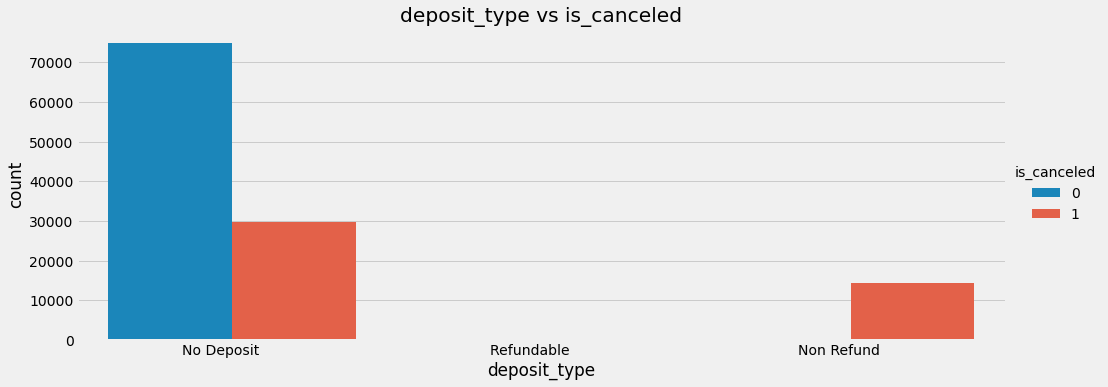

In [31]:
sns.catplot(x="deposit_type", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('deposit_type vs is_canceled')

plt.savefig('../docs/deposit_type vs is_canceled.png', bbox_inches = 'tight')

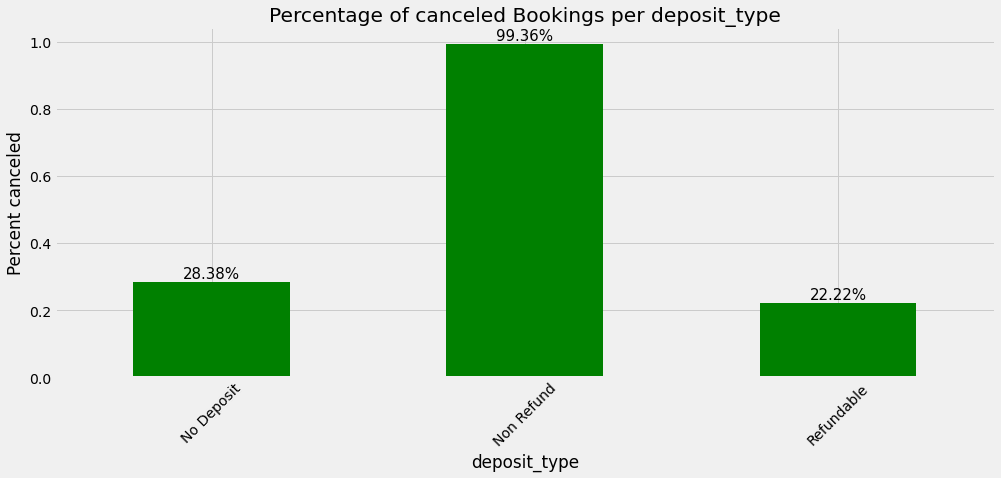

In [32]:
graph_percentage('deposit_type', ('No Deposit', 'Non Refund','Refundable'))

plt.savefig('../docs/percentage per deposit_type', bbox_inches = 'tight')

>**A11:** Very surprisingly, it seems that almost all of those who made a non-refundable deposit eventually canceled their appointment.

>**Q12:** Finaly, what are the most common types of customers, and is there an obvious correlation between our target feature and **customer_type**?

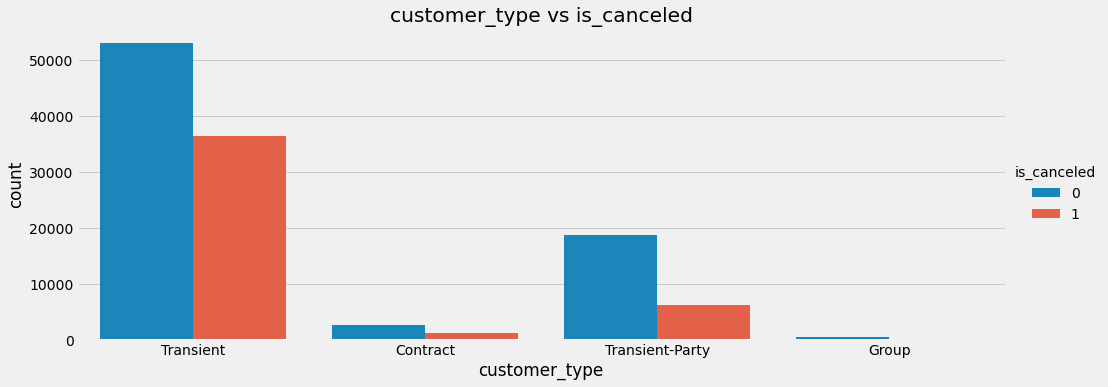

In [33]:
sns.catplot(x="customer_type", hue = 'is_canceled', kind="count", data=hotels, height=5, aspect=14/5)
plt.title('customer_type vs is_canceled')
plt.show()

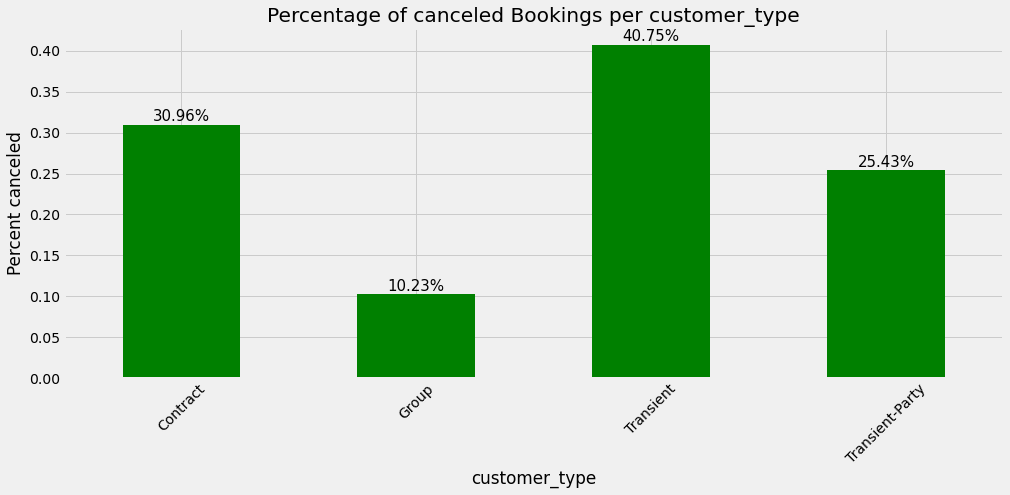

In [34]:
graph_percentage('customer_type', ('Contract', 'Group', 'Transient', 'Transient-Party'))

**A12:** It seems that, even after we noticed earlier that 10 of the largest groups had their bookings canceled, the **Group** type of customers are having the lowest cancelation rate, with just above **10%**. 

## 6. Data cleaning - Dealing with missing values <a class="anchor" id="chapter6"></a>

In [35]:
missing = pd.concat([hotels.isnull().sum(), 100 * hotels.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head()

,count,%
country,488,0.408748
children,4,0.003350
hotel,0,0.000000
agent,0,0.000000
reserved_room_type,0,0.000000


At first we have only 2 features with missing values - 488 missing countries and 4 missing children number.

We will replace the missing country values with **'UNK'**. Another option would have been to replace those with the most common value, in this case **PRT(Portugal)** but maybe those missing values are especially from tourists that came from outside Portugal, so we don't want to loose any specific info.

Fot the missing **children** data, we will replace the missing data with the median value.

In [36]:
#Replacing missing countries with 'UNK'
condition1 = hotels.country.isnull()
hotels.loc[condition1, 'country'] = 'UNK'
hotels.country.isnull().sum()

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0

In [37]:
#Replacing missing children values with the median value - 0 

hotels['children'].fillna(value=hotels['children'].median(), inplace=True)
hotels.children.value_counts()

E:\Anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


0.0     110799
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Let's verify we don't have any missing values left.

In [38]:
missing = pd.concat([hotels.isnull().sum(), 100 * hotels.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending = False).head()

,count,%
hotel,0,0.0
is_canceled,0,0.0
reservation_status,0,0.0
total_of_special_requests,0,0.0
required_car_parking_spaces,0,0.0


We can remember from the initial inspection of the dataset that both **agent** and **company** had NULL values.
We will explore these 2 features

In [39]:
hotels.agent.value_counts().head(10), hotels.company.value_counts().head(10)

(          9    31961
        NULL    16340
         240    13922
           1     7191
          14     3640
           7     3539
           6     3290
         250     2870
         241     1721
          28     1666
 Name: agent, dtype: int64,
        NULL    112592
          40       927
         223       784
          67       267
          45       250
         153       215
         174       149
         219       141
         281       138
         154       133
 Name: company, dtype: int64)

We are missing 16340 agent values and 112593 company values. Which makes sense, since there might be some visitors that made the booking without an agent, and most of the people staying in the hotel will be paying for the stay themselves and not their company.

We will replace those **NULL** values with **no_agent** or **no_company**.

In [40]:
hotels['agent'] = hotels['agent'].str.replace('NULL', 'no_agent')
hotels['company'] = hotels['company'].str.replace('NULL', 'no_company')
hotels.agent.value_counts().head(15), hotels.company.value_counts().head(15)

<ipython-input-40-08e9e3af7b3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['agent'] = hotels['agent'].str.replace('NULL', 'no_agent')
<ipython-input-40-08e9e3af7b3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels['company'] = hotels['company'].str.replace('NULL', 'no_company')


(          9        31961
        no_agent    16340
         240        13922
           1         7191
          14         3640
           7         3539
           6         3290
         250         2870
         241         1721
          28         1666
           8         1514
           3         1336
          37         1230
          19         1061
          40         1039
 Name: agent, dtype: int64,
        no_company    112592
          40             927
         223             784
          67             267
          45             250
         153             215
         174             149
         219             141
         281             138
         154             133
         405             119
         233             114
          51              99
          94              87
          47              72
 Name: company, dtype: int64)

Since we are having over 300 different values for both **agent** and **company**, we will keep just the agent in over 2000 records and the companies from over 500 records.

The rest will be renamed **Other**.

In [41]:
agent_counts = hotels.agent.value_counts()
mask = hotels['agent'].isin(agent_counts[agent_counts <2000].index)
hotels.loc[mask, 'agent'] = 'Other'
hotels.agent.value_counts()

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Other              36636
          9        31961
       no_agent    16340
        240        13922
          1         7191
         14         3640
          7         3539
          6         3290
        250         2870
Name: agent, dtype: int64

In [42]:
company_counts = hotels.company.value_counts()
mask = hotels['company'].isin(company_counts[company_counts <500].index)
hotels.loc[mask, 'company'] = 'Other'
hotels.company.value_counts()

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


       no_company    112592
Other                  5086
         40             927
        223             784
Name: company, dtype: int64

So we have **reduced the number of values to 9 for agents and to 4 for companies**.

Finally, we will reset the index and delete the old one, since it came from 2 different datasets.

In [43]:
hotels.reset_index(inplace = True)
hotels.drop(columns = 'index', axis = 1, inplace = True)

hotels

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Algarve Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,no_agent,no_company,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Algarve Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,no_agent,no_company,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Algarve Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,no_agent,no_company,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Algarve Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,Other,no_company,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Algarve Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,no_company,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,Lisbon City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,Other,no_company,0,Transient,96.14,0,0,Check-Out,2017-09-06
119385,Lisbon City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,no_company,0,Transient,225.43,0,2,Check-Out,2017-09-07
119386,Lisbon City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,no_company,0,Transient,157.71,0,4,Check-Out,2017-09-07
119387,Lisbon City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,Other,no_company,0,Transient,104.40,0,0,Check-Out,2017-09-07


## 7. Saving Data <a class="anchor" id="chapter7"></a>

At the end of this notebook, we are saving the cleaned data to our interim folder, ready to move on to the **Exploratory Data Analysis** stage.

In [44]:
# Saving cleaned data into interim folder
hotels.to_csv('../data/interim/hotels_cleaned.csv')